In [172]:
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\51968\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\51968\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
data = pd.read_csv('cleaned-winemag-data-130k-v2.csv', index_col = 0)
data.head(5)

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [174]:
# take log value of column price.
data['price_log'] = np.log(data['price'])

In [175]:
# clean the column description.
# turn every word in column description into lowercase, and remove irrelevent terms.
data['description'] = data['description'].str.lower()
data['description'] = data['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))

In [176]:
# use regular expression to tokenize sentences to list of words.
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = data['description'].apply(tokenizer.tokenize)

In [177]:
# when split descriptions into individual words, create list to save all individual words, and add a new feature description lengths into dataset.
all_words = []
for tokens in words_descriptions:
    for word in tokens:
        all_words.append(word)
description_lengths = []
for tokens in words_descriptions:
    description_lengths.append(len(tokens))
data['description_lengths'] = description_lengths
vocabularies = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabularies)))
count_all_words = Counter(all_words)
count_all_words.most_common(100)

4937774 words total, with a vocabulary size of 30452


[('and', 321309),
 ('the', 204668),
 ('a', 166325),
 ('of', 159396),
 ('with', 111439),
 ('this', 104965),
 ('is', 89535),
 ('it', 79887),
 ('wine', 74246),
 ('flavors', 58016),
 ('in', 57888),
 ('to', 51898),
 ('s', 49361),
 ('fruit', 46032),
 ('on', 41934),
 ('that', 37566),
 ('aromas', 36229),
 ('palate', 35107),
 ('acidity', 32127),
 ('finish', 32113),
 ('from', 30057),
 ('but', 29053),
 ('tannins', 28452),
 ('drink', 27880),
 ('cherry', 26901),
 ('black', 26638),
 ('ripe', 25117),
 ('are', 23832),
 ('has', 22855),
 ('for', 20216),
 ('red', 19966),
 ('by', 18993),
 ('spice', 17732),
 ('notes', 17470),
 ('an', 16920),
 ('as', 16898),
 ('its', 16685),
 ('oak', 16422),
 ('rich', 16225),
 ('fresh', 16035),
 ('dry', 15945),
 ('now', 15794),
 ('berry', 15627),
 ('nose', 15512),
 ('full', 14713),
 ('plum', 13721),
 ('soft', 12644),
 ('sweet', 12626),
 ('fruits', 12489),
 ('well', 12380),
 ('apple', 12361),
 ('blend', 12107),
 ('blackberry', 11846),
 ('white', 11821),
 ('crisp', 11746),
 (

In [178]:
# convert words with same meaning to one single word(e.g. walk, walked, walking ->walk), and delete all stopwords.
stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
data['description_cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))

In [179]:
# checked the cleaned word list.
all_words = []
for tokens in words_descriptions:
    for word in tokens:
        all_words.append(word)
vocabularies = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabularies)))
count_all_words = Counter(all_words)
count_all_words.most_common(100)

3010589 words total, with a vocabulary size of 21848


[('wine', 76823),
 ('flavor', 65592),
 ('fruit', 58926),
 ('aroma', 37541),
 ('finish', 37167),
 ('acid', 36618),
 ('palat', 35220),
 ('drink', 31234),
 ('cherri', 30909),
 ('tannin', 30397),
 ('ripe', 26752),
 ('black', 26666),
 ('dri', 24411),
 ('note', 23161),
 ('spice', 21709),
 ('rich', 20454),
 ('red', 20196),
 ('fresh', 20132),
 ('berri', 17826),
 ('show', 17205),
 ('oak', 16961),
 ('nose', 15527),
 ('plum', 15014),
 ('sweet', 14947),
 ('full', 14823),
 ('offer', 14737),
 ('textur', 14713),
 ('appl', 13984),
 ('balanc', 13966),
 ('blackberri', 13949),
 ('blend', 13851),
 ('bodi', 13430),
 ('age', 13286),
 ('soft', 13175),
 ('crisp', 12507),
 ('well', 12391),
 ('structur', 12170),
 ('white', 11972),
 ('light', 11972),
 ('dark', 11479),
 ('fruiti', 11017),
 ('citru', 10781),
 ('miner', 10480),
 ('hint', 10430),
 ('bright', 10374),
 ('give', 10269),
 ('raspberri', 10232),
 ('vanilla', 10200),
 ('cabernet', 10171),
 ('herb', 10102),
 ('touch', 9676),
 ('year', 9542),
 ('pepper', 953

In [180]:
# create the sentiment intensity analyze model.
SIA = SentimentIntensityAnalyzer()
# apply model, and create variables.
# use sentiment analysis to give polarity score, neutral score, negative score, positive score and overall sentiment to each description.
sentiment = data.copy()
sentiment['polarity_score'] = sentiment['description_cleaned'].apply(lambda x: SIA.polarity_scores(x)['compound'])
sentiment['neutral_score'] = sentiment['description_cleaned'].apply(lambda x: SIA.polarity_scores(x)['neu'])
sentiment['negative_score'] = sentiment['description_cleaned'].apply(lambda x: SIA.polarity_scores(x)['neg'])
sentiment['positive_score'] = sentiment['description_cleaned'].apply(lambda x: SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score > 0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score ==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score < 0,'sentiment']='NEGATIVE'

In [181]:
def sentiment_analyzer_scores(sentence):
    score = SIA.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [182]:
sentiment_analyzer_scores('happy')

happy----------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}


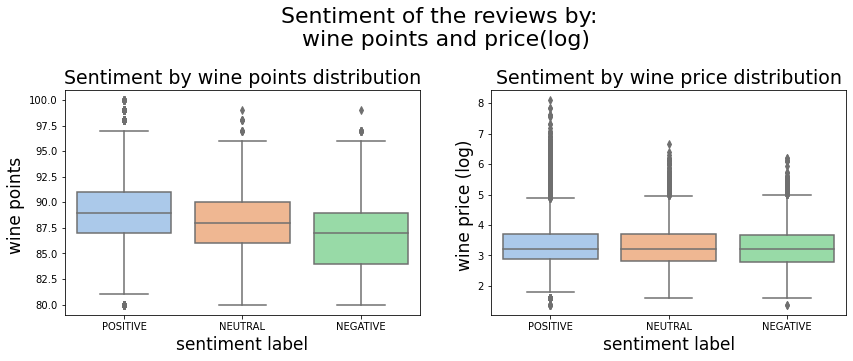

In [183]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n wine points and price(log)', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data = sentiment, palette = 'pastel')
ax.set_title("Sentiment by wine points distribution", fontsize=19)
ax.set_ylabel("wine points ", fontsize=17)
ax.set_xlabel("sentiment label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data = sentiment, palette = 'pastel')
ax1.set_title("Sentiment by wine price distribution", fontsize=19)
ax1.set_ylabel("wine price (log) ", fontsize=17)
ax1.set_xlabel("sentiment label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

In [186]:
sentiment.to_csv('sentiment-analysis-result.csv')